In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px 

In [19]:
data = pd.read_csv('dataset.csv').dropna().reset_index().drop(labels=['index'], axis=1)

In [20]:
data

,title,artist,genre,demo,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Vente Pa' Ca (feat. Maluma),Ricky Martin,"['dance pop', 'latin', 'latin pop', 'mexican p...",https://p.scdn.co/mp3-preview/21e38a8983daf1c3...,0.663,0.920,11.0,-4.070,0.0,0.2260,...,0.000017,0.1010,0.533,99.935,7DM4BPaS7uofFul3ywMe46,spotify:track:7DM4BPaS7uofFul3ywMe46,https://api.spotify.com/v1/tracks/7DM4BPaS7uof...,https://api.spotify.com/v1/audio-analysis/7DM4...,259196.0,4.0
1,Reggaetón Lento (Bailemos),CNCO,"['boy band', 'latin', 'latin pop', 'reggaeton']",https://p.scdn.co/mp3-preview/ced5c17cadb43603...,0.761,0.838,4.0,-3.073,0.0,0.0502,...,0.000000,0.1760,0.710,93.974,3AEZUABDXNtecAOSC1qTfo,spotify:track:3AEZUABDXNtecAOSC1qTfo,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,https://api.spotify.com/v1/audio-analysis/3AEZ...,222560.0,4.0
2,SAFARI,"Tyler, The Creator","['hip hop', 'rap']",https://p.scdn.co/mp3-preview/46545a950dc150f8...,0.471,0.710,1.0,-6.462,0.0,0.2130,...,0.000002,0.3380,0.599,80.453,09xpQPfKWdio1wx6v17dGa,spotify:track:09xpQPfKWdio1wx6v17dGa,https://api.spotify.com/v1/tracks/09xpQPfKWdio...,https://api.spotify.com/v1/audio-analysis/09xp...,177743.0,4.0
3,Cuando Se Pone a Bailar,Rombai,['cumbia pop'],https://p.scdn.co/mp3-preview/02730a7c430c379f...,0.588,0.682,11.0,-7.169,0.0,0.1730,...,0.000027,0.0840,0.937,205.643,1MpKZi1zTXpERKwxmOu1PH,spotify:track:1MpKZi1zTXpERKwxmOu1PH,https://api.spotify.com/v1/tracks/1MpKZi1zTXpE...,https://api.spotify.com/v1/audio-analysis/1MpK...,195274.0,4.0
4,Otra vez (feat. J Balvin),Zion & Lennox,"['latin', 'latin hip hop', 'reggaeton', 'trap ...",https://p.scdn.co/mp3-preview/80f292da16e796af...,0.832,0.772,10.0,-5.429,1.0,0.1000,...,0.000486,0.4400,0.704,96.016,3QwBODjSEzelZyVjxPOHdq,spotify:track:3QwBODjSEzelZyVjxPOHdq,https://api.spotify.com/v1/tracks/3QwBODjSEzel...,https://api.spotify.com/v1/audio-analysis/3QwB...,209453.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,Sweet Scar,Weird Genius,['indonesian pop'],https://p.scdn.co/mp3-preview/4e8d36d748dfa5b8...,0.529,0.857,0.0,-1.183,1.0,0.0385,...,0.000000,0.0989,0.417,150.143,3R0FDwQSXOiO5gaOZFxKZ5,spotify:track:3R0FDwQSXOiO5gaOZFxKZ5,https://api.spotify.com/v1/tracks/3R0FDwQSXOiO...,https://api.spotify.com/v1/audio-analysis/3R0F...,194855.0,4.0
9315,Lollipop (Ode To Jim),Alvvays,"['dream pop', 'dreamo', 'indie pop', 'indie ro...",https://p.scdn.co/mp3-preview/191c371dcbfe17ea...,0.275,0.930,5.0,-3.229,1.0,0.0524,...,0.497000,0.3350,0.473,166.079,4B0DKl08l4AJflQmZkEDvQ,spotify:track:4B0DKl08l4AJflQmZkEDvQ,https://api.spotify.com/v1/tracks/4B0DKl08l4AJ...,https://api.spotify.com/v1/audio-analysis/4B0D...,197202.0,4.0
9316,Heal,Tom Odell,"['chill pop', 'pop']",https://p.scdn.co/mp3-preview/25959bffb68099a5...,0.445,0.179,1.0,-12.938,1.0,0.0396,...,0.000560,0.1070,0.119,72.246,4KlL5Bwlm4yHYxr0B2rHci,spotify:track:4KlL5Bwlm4yHYxr0B2rHci,https://api.spotify.com/v1/tracks/4KlL5Bwlm4yH...,https://api.spotify.com/v1/audio-analysis/4KlL...,193080.0,4.0
9317,Goodbye Kisses,Joe Hertz,"['alternative r&b', 'indie r&b', 'indie soul',...",https://p.scdn.co/mp3-preview/f73a18675f6d4b9a...,0.683,0.549,11.0,-7.938,0.0,0.1720,...,0.000005,0.5720,0.391,95.029,0itkWlo0hxkmPtsDZkvScn,spotify:track:0itkWlo0hxkmPtsDZkvScn,https://api.spotify.com/v1/tracks/0itkWlo0hxkm...,https://api.spotify.com/v1/audio-analysis/0itk...,220300.0,4.0


In [4]:
num_only = data.select_dtypes(np.number).copy()

In [5]:
num_only

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.663,0.920,11.0,-4.070,0.0,0.2260,0.004310,0.000017,0.1010,0.533,99.935,259196.0,4.0
1,0.761,0.838,4.0,-3.073,0.0,0.0502,0.400000,0.000000,0.1760,0.710,93.974,222560.0,4.0
2,0.471,0.710,1.0,-6.462,0.0,0.2130,0.061800,0.000002,0.3380,0.599,80.453,177743.0,4.0
3,0.588,0.682,11.0,-7.169,0.0,0.1730,0.085100,0.000027,0.0840,0.937,205.643,195274.0,4.0
4,0.832,0.772,10.0,-5.429,1.0,0.1000,0.055900,0.000486,0.4400,0.704,96.016,209453.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,0.529,0.857,0.0,-1.183,1.0,0.0385,0.246000,0.000000,0.0989,0.417,150.143,194855.0,4.0
9315,0.275,0.930,5.0,-3.229,1.0,0.0524,0.000596,0.497000,0.3350,0.473,166.079,197202.0,4.0
9316,0.445,0.179,1.0,-12.938,1.0,0.0396,0.952000,0.000560,0.1070,0.119,72.246,193080.0,4.0
9317,0.683,0.549,11.0,-7.938,0.0,0.1720,0.191000,0.000005,0.5720,0.391,95.029,220300.0,4.0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(num_only)

In [22]:
X[0]

array([ 0.13554824,  1.4162082 ,  1.56680967,  0.80106981, -1.19847398,
        1.2077964 , -1.01548443, -0.27518245, -0.54345503,  0.07357847,
       -0.74227692,  0.62709905,  0.15806323])

In [23]:
to_keep = num_only.columns

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_data = pca.transform(X)
X_2D = pd.DataFrame(pca_data)

In [25]:
X_2D

,0,1
0,-1.810710,-0.426535
1,-1.395301,-0.573977
2,-0.701171,-0.170683
3,-1.457461,-0.309121
4,-1.696674,-0.306883
...,...,...
9314,-0.941482,1.662510
9315,-0.280887,2.822782
9316,4.047180,-0.380125
9317,-0.245043,-0.423390


In [26]:
elbow_method = [] 

for i in range(1, 50): 
    print(i, end='\r')
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_2D) 
    elbow_method.append(kmeans.inertia_)

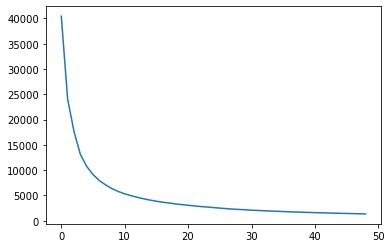

In [27]:
plt.plot(elbow_method)

Using this elbow method, we can see that 7 is a perfect number of clusters.

In [28]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++')

kmeans.fit(X_2D)

data['clusters'] = kmeans.predict(X_2D)

In [29]:
colors = ['#f94144','#4d908e', '#f9844a', '#f9c74f', '#90be6d', '#43aa8b', '#577590', '#277da1']

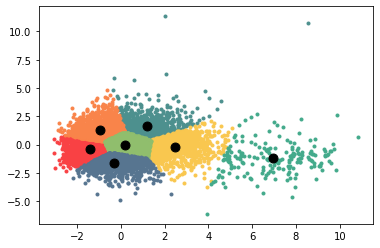

In [30]:
centroids = kmeans.cluster_centers_
 
#plotting the results:
 
for i in range(7):
    plt.scatter(X_2D[data['clusters']==i][0], X_2D[data['clusters']==i][1], marker=".", color=colors[i])
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'black')
plt.show()

In [57]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="##",
                                                          client_secret="##"))

In [58]:
def search(title):
    
    track = sp.search(title, limit=1)["tracks"]['items']
    if(len(track) == 0):
        return None
    else:
        track=track[0]
        artist = sp.artist(track['album']["artists"][0]["external_urls"]["spotify"])
        res = [track['name'], track['album']['artists'][0]['name'], artist["genres"], track['preview_url'],sp.audio_features(track['id'])[0]]
    

    return res

In [59]:
search("bts butter")[2]

KeyboardInterrupt: 

In [ ]:
def get_features(title):
    title_data = search(title)
    
    if (title_data == None):
        return None
    
    x = title_data[-1]
    
    x_new = {}
    
    for key in x.keys():
        if key in to_keep:
            x_new[key] = x[key]
    
    df = pd.DataFrame(columns = x_new.keys())
    
    df = df.append(x_new, ignore_index=True)
    
    
   
    return title_data, df

In [ ]:
new = get_features("bts dynamite")[1]

In [ ]:
new

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import ast
def predict(song, mode='normal'):
    
    song_data, features = get_features(song) # retrieving features from Spotify API

    
    X0 = scaler.transform(features) # Scaling
    X0_pca = pca.transform(X0) # Dimension reduction
       
    pred=kmeans.predict(X0_pca) # Cluster prediction
    
    
    # Selecting all the songs of the same cluster
    data_cluster = data[data['clusters']==pred[0]].copy().reset_index()
    data_cluster_2 = data_cluster.drop(labels=['clusters', 'index'], axis=1).copy()
   
    X_cluster = scaler.transform(data_cluster_2.select_dtypes(np.number).copy())

    # We use euclidean distance to classify the songs from the closest to the farthest from the original music.
    cdist_X0 = euclidean_distances(X0, X_cluster)
    songs = data_cluster.loc[np.argsort(cdist_X0)[0]]
    
    # If the original song is in the dataset, we remove it
    songs = songs.drop(songs[songs['title'] == song_data[0]].index)

    
    if mode == 'genre': # if genre mode is activated
        final = []
        for row in songs.genre:
            new_row = False
            for el in ast.literal_eval(row): # we convert the string list row to a real python list
                if el in song_data[2]:
                    new_row = True
            final.append(new_row) # True only If the sound has at least one genre in common with the input music
        songs = songs[final] # Selecting the titles with the correct genres
    
        
    return song_data, songs[['title', 'artist', 'demo', 'genre']][:10]

In [ ]:
song_data, songs = predict(["dynamite bts"], mode='genre')

In [ ]:
from IPython.display import HTML

HTML(songs.to_html(render_links=True, escape=False))

In [ ]:
centroids = kmeans.cluster_centers_
 
#plotting the results:
 
for i in range(7):
    plt.scatter(X_2D[data['clusters']==i][0], X_2D[data['clusters']==i][1], marker=".", color=colors[i])
    
plt.scatter(X_2D[data['title'].isin(songs['title'])][0],X_2D[data['title'].isin(songs['title'])][1], marker="o", color='black')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'grey')
plt.show()

In [ ]:
import flask
from flask import Flask, redirect, url_for, render_template, request

my_app=flask.Flask(__name__)

@my_app.route("/", methods=['GET', 'POST'])
def home():
    return render_template("index.html")

@my_app.route("/search", methods=["POST","GET"])
def recommend():
    if request.method=='POST':
        mysong=request.form["song"]
        
        pred = predict(mysong, mode = request.form["mode"])
        res = pred[1].to_numpy()
        song = pred[0]
    
        return render_template('tables.html',  tables=res, song=song)
    
    else:
        return "Music not found"

if __name__=="__main__":
    my_app.run(debug=True, use_reloader=False)

In [51]:
x = np.array([0.34,1.72]).reshape(-1,1)
y = np.array([0.467,0.21]).reshape(-1,1)

In [53]:
from scipy.spatial.distance import cdist
cdist(x, y)

array([[0.127, 0.13 ],
       [1.253, 1.51 ]])